### Main Algorithm

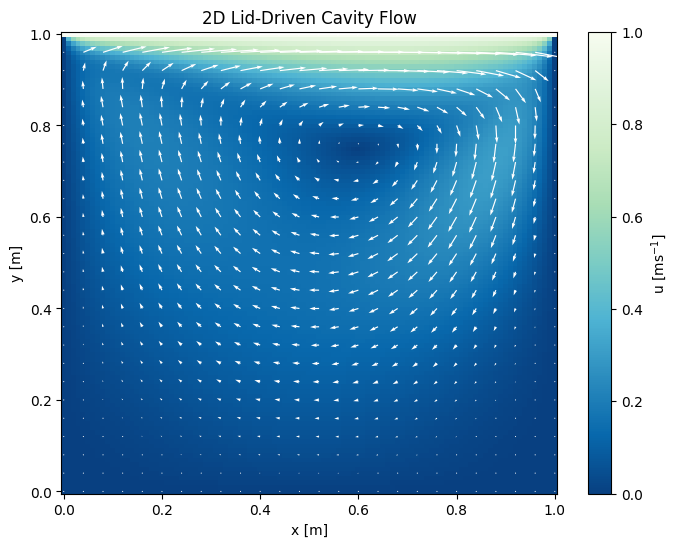

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
Lx, Ly = 1.0, 1.0  # Domain size
nx, ny = 101, 101  # Number of grid points
dx, dy = Lx/(nx-1), Ly/(ny-1)  # Grid spacing
Re = 100.0  # Reynolds number
dt = 0.001  # Time step
T = 50.0  # Final time

# Grid
x = np.linspace(0.0, Lx, nx)
y = np.linspace(0.0, Ly, ny)
X, Y = np.meshgrid(x, y)

# Initial conditions
u = np.zeros((ny, nx))
v = np.zeros((ny, nx))
p = np.zeros((ny, nx))

# Boundary conditions
u[:, 0] = 0.0  # Left wall
u[:, -1] = 0.0  # Right wall
u[0, :] = 0.0  # Bottom wall
u[-1, :] = 1.0  # Top wall
v[:, 0] = 0.0  # Left wall
v[:, -1] = 0.0  # Right wall
v[0, :] = 0.0  # Bottom wall
v[-1, :] = 0.0  # Top wall

# Solver
for n in range(int(T/dt)):
    # Pressure Poisson equation
    b = np.zeros((ny, nx))
    b[1:-1, 1:-1] = (1.0/dt)*((u[1:-1, 2:]-u[1:-1, 0:-2])/(2.0*dx) + 
                               (v[2:, 1:-1]-v[0:-2, 1:-1])/(2.0*dy))
    for q in range(100):
        pn = p.copy()
        p[1:-1, 1:-1] = ((pn[1:-1, 2:]+pn[1:-1, 0:-2])*dy**2 +
                         (pn[2:, 1:-1]+pn[0:-2, 1:-1])*dx**2 -
                         b[1:-1, 1:-1]*dx**2*dy**2)/(2.0*(dx**2+dy**2))
        p[:, -1] = p[:, -2]  # Right wall
        p[0, :] = p[1, :]  # Bottom wall
        p[:, 0] = p[:, 1]  # Left wall
        p[-1, :] = p[-2, :]  # Top wall

    # Velocity update
    u[1:-1, 1:-1] = (u[1:-1, 1:-1] -
                     u[1:-1, 1:-1]*dt/dx*(u[1:-1, 1:-1]-u[1:-1, 0:-2]) -
                     v[1:-1, 1:-1]*dt/dy*(u[1:-1, 1:-1]-u[0:-2, 1:-1]) -
                     dt/(2.0*Re*dx)*(p[1:-1, 2:]-p[1:-1, 0:-2]) +
                     dt/Re*(u[1:-1, 2:]-2.0*u[1:-1, 1:-1]+u[1:-1, 0:-2])/dx**2 +
                     dt/Re*(u[2:, 1:-1]-2.0*u[1:-1, 1:-1]+u[0:-2, 1:-1])/dy**2)
    v[1:-1, 1:-1] = (v[1:-1, 1:-1] -
                     u[1:-1, 1:-1]*dt/dx*(v[1:-1, 1:-1]-v[1:-1, 0:-2]) -
                     v[1:-1, 1:-1]*dt/dy*(v[1:-1, 1:-1]-v[0:-2, 1:-1]) -
                     dt/(2.0*Re*dy)*(p[2:, 1:-1]-p[0:-2, 1:-1]) +
                     dt/Re*(v[1:-1, 2:]-2.0*v[1:-1, 1:-1]+v[1:-1, 0:-2])/dx**2 +
                     dt/Re*(v[2:, 1:-1]-2.0*v[1:-1, 1:-1]+v[0:-2, 1:-1])/dy**2)

    # Boundary conditions
    u[:, 0] = 0.0  # Left wall
    u[:, -1] = 0.0  # Right wall
    u[0, :] = 0.0  # Bottom wall
    u[-1, :] = 1.0  # Top wall
    v[:, 0] = 0.0  # Left wall
    v[:, -1] = 0.0  # Right wall
    v[0, :] = 0.0  # Bottom wall
    v[-1, :] = 0.0  # Top wall

# Plotting
fig = plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, np.sqrt(u**2 + v**2), cmap='GnBu_r')
colorbar = plt.colorbar()
colorbar.set_label('u [ms$^{-1}$]')
skip = (slice(None, None, 4), slice(None, None, 4))
plt.quiver(X[skip], Y[skip], u[skip], v[skip], color='white')
plt.title('2D Lid-Driven Cavity Flow')
plt.xlabel('x [m]')
plt.ylabel('y [m]')
plt.show()

### Visualization

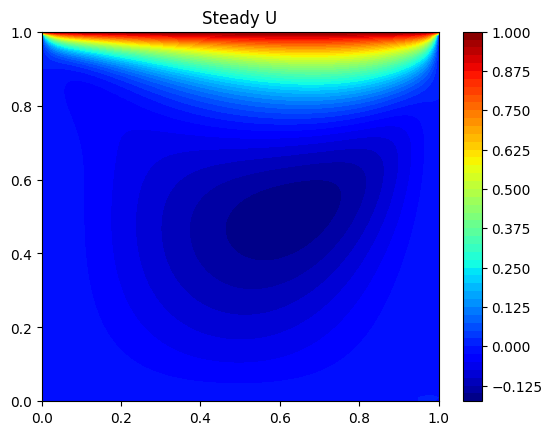

In [61]:
X, Y = np.meshgrid(x, y)
plt.figure()
plt.contourf(X, Y, u, 50, cmap='jet')
plt.colorbar()
# plt.axis([0, 1, 0, 1])
plt.title("Steady U")
plt.show()

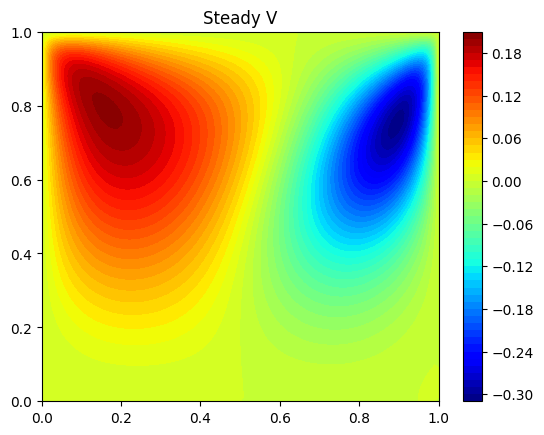

In [62]:
plt.figure()
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, v, 50, cmap='jet')
plt.colorbar()
# plt.axis([0, 1, 0, 1])
plt.title("Steady V")
plt.show()

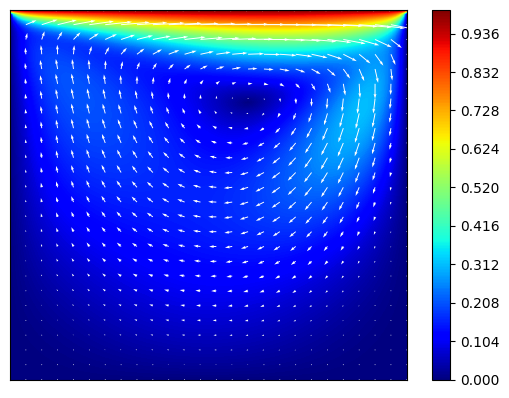

In [63]:
plt.figure()
X, Y = np.meshgrid(x, y)
plt.contourf(X, Y, np.sqrt(u**2 + v**2), 300, cmap='jet')
plt.colorbar()
skip = (slice(None, None, 4), slice(None, None, 4))
plt.quiver(X[skip], Y[skip], u[skip], v[skip], color='w')
# plt.title('Re = {0}, Grid: {1}x{2}, Streamline: Velocity Field'.format(Re, imax, jmax))
plt.xticks([])
plt.yticks([])
# plt.savefig("./Benchmark/Re{0}/Stream_Re{0}_Grid{1}x{2}.png".format(Re, imax, jmax), dpi=500)
plt.show()

/Users/jacksong/opt/anaconda3/envs/QCFD_env/lib/python3.8/site-packages/matplotlib/patches.py:3331: RuntimeWarning: invalid value encountered in double_scalars
  cos_t, sin_t = head_length / head_dist, head_width / head_dist


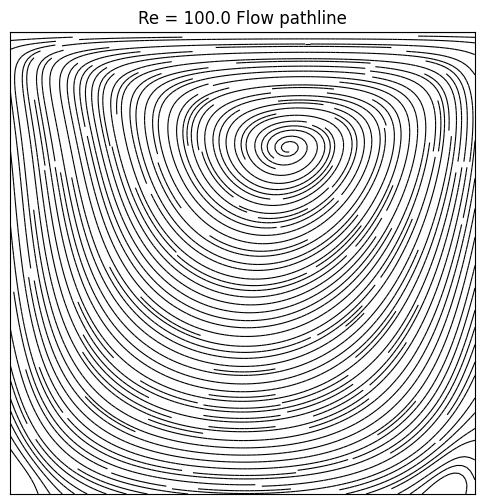

In [64]:
plt.figure(figsize=(6,6))
X, Y = np.meshgrid(x, y)
plt.streamplot(X, Y, u, v, density=3, linewidth=0.8, arrowsize=0., color='k')
plt.title("Re = {0} Flow pathline".format(Re))
plt.xticks([])
plt.yticks([])
plt.show()

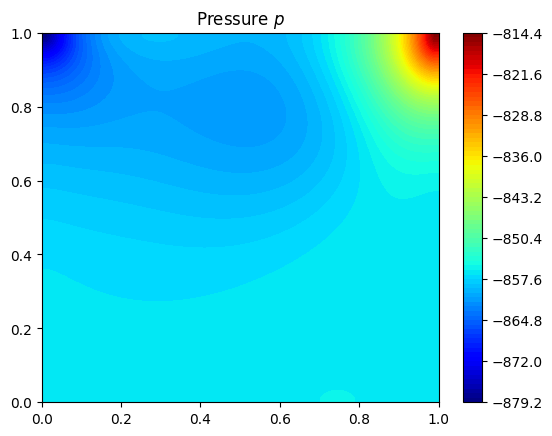

In [65]:
plt.figure()
plt.contourf(X, Y, p, 80, cmap='jet')
plt.colorbar()
# plt.axis([0, 1, 0, 1])
plt.title('Pressure $p$')
plt.show()

### Benchmark with literature data

Ghia, U. K. N. G., Kirti N. Ghia, and C. T. Shin. "High-Re solutions for incompressible flow using the Navier-Stokes equations and a multigrid method." Journal of computational physics 48.3 (1982): 387-411.

In [66]:
GhiaU = np.loadtxt('GhiaU.txt', skiprows=1)
GhiaV = np.loadtxt('GhiaV.txt', skiprows=1)
y_Ghia = GhiaU[:, 0]
x_Ghia = GhiaV[:, 0]

In [67]:
# Understand what's inside the benchmark data
import pandas as pd
# pd.set_option('display.max_columns', None)
df = pd.read_table("GhiaU.txt", skiprows=0, delimiter='\r')
print(df)

   # Ghia, U. K. N. G., Ghia, K. N., & Shin, C. T. (1982). 
0   # High-Re solutions for incompressible flow us...      
1   # Journal of computational physics, 48(3), 387...      
2                                                   #      
3                                           # TABLE I      
4   # Results for $u$-velocity along Vertical Line...      
5   #---------------------------------------------...      
6              #                                   Re      
7   #       --------------------------------------...      
8   #  y      100      400      1000     3200     ...      
9   #---------------------------------------------...      
10  1.0000  1.00000  1.00000  1.00000  1.00000  1....      
11  0.9766  0.84123  0.75837  0.65928  0.53236  0....      
12  0.9688  0.78871  0.68439  0.57492  0.48296  0....      
13  0.9609  0.73722  0.61756  0.51117  0.46547  0....      
14  0.9531  0.68717  0.55892  0.46604  0.46101  0....      
15  0.8516  0.23151  0.29093  0.33304  0

#### Re = 100

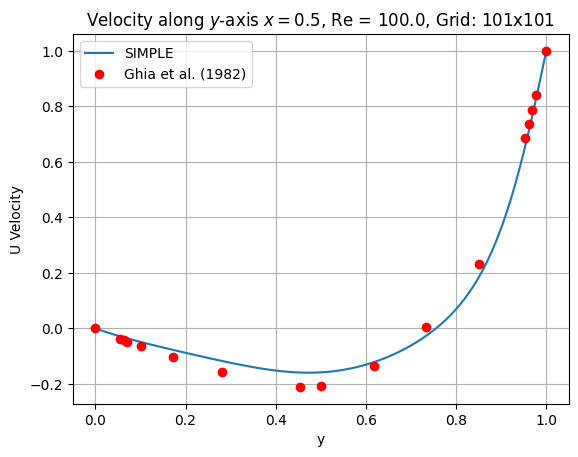

In [68]:
plt.plot(y, u[:,51], label="SIMPLE")
plt.plot(y_Ghia, GhiaU[:, 1], 'ro', label = "Ghia et al. (1982)")
plt.grid()
plt.xlabel("y")
plt.ylabel("U Velocity")
plt.title("Velocity along $y$-axis $x=0.5$, Re = {0}, Grid: {1}x{2}".format(Re, nx, ny))
plt.legend()
# plt.savefig("./Benchmark/Re{0}/UBench_Re{0}_Grid{1}x{2}.png".format(Re, imax, jmax), dpi=500)

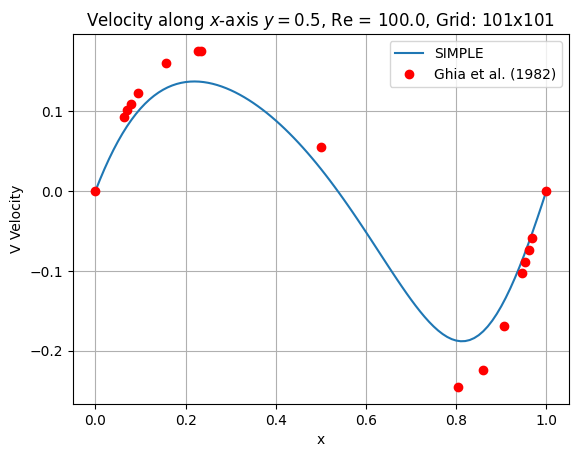

In [69]:
plt.plot(x, v[51,:], label="SIMPLE")
plt.plot(x_Ghia, GhiaV[:, 1], 'ro', label = "Ghia et al. (1982)")
plt.grid()
plt.xlabel("x")
plt.ylabel("V Velocity")
plt.title("Velocity along $x$-axis $y=0.5$, Re = {0}, Grid: {1}x{2}".format(Re, nx, ny))
plt.legend()
# plt.savefig("./Benchmark/Re{0}/VBench_Re{0}_Grid{1}x{2}.png".format(Re, imax, jmax), dpi=500)